# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
   * A model is linear if it has one or more variables in the model's defining equation. In this equation, all variables must be raised to the power of one, and the parameters must appear in a linear way. Typically, when the model's equation is plotted with one variable, the resulting line is a straight one. If there are more than 2 variables, it still represents something called linear regression, and would appear as a plane or hyperplane when plotted in higher dimensions, not a curve. Ultimately, when a model is "linear", that means its parameters are linear.

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
   * So, based on my online research, one-hot-encoding is using binary (1, 0) system to represent if a category is present for a categorical variable, or not. Based on this, we average the outcome values for each category, except for one (the reference category). This one variable will represent the intercept category. We'd then subtract that average from all other category averages to represent the other coefficients. Based on this question, I'd say we'd interpret the coefficient of a dummy variable as being based on the average of the intercept category, or based on the chosen intercept category.

3. Can linear regression be used for classification? Explain why, or why not.
    * Linear regression can be used for classification, like in the dummy/one-hot-encoded variable example. In this case, we assign binary values (such as 0 and 1) to represent the categories. The model can then predict values based on the fitted line, and the coefficients represent how much each variable contributes relative to the intercept. However, when we use linear regression for classification, we may end up with predicted values outside of the 0 to 1 range, which isn’t ideal for binary or categorical outcomes. An alternative is using logistic regression, which we learned in class. Logistic regression maps predicted values within the 0 to 1 range using a sigmoid function, making it more appropriate for binary or categorical classification tasks.

4. What are signs that your linear model is over-fitting?
    * If the $R^2$ value is too close to 1 on the training data but much lower on the testing data, this is usually a sign of overfitting. In addition, having unusually high p values for each coefficient (or a majority of them) is another sign of overfitting, as it suggests that the coefficients aren't statistically significant/adding to the "noise". If the test error, like SSE or MSE, of the model is much lower on the training data than the testing data, this is another sign of overfitting, as this suggests that the model is too complex and not generalizing well to new data.

5. Clearly explain multi-colinearity using the two-stage least squares technique.
   * First I'll define multi-colinearity: it's when 2 or more independent variables contain a high correlation. This makes it difficult for the model to predict the outcome (output variable) since there's a convolution on what variables the prediction are based on. This makes it hard to isolate the effects of one variable.
   * 2-stage least squares essentially predicts the predictor variable based on another variable, then predicts the outcome variable based on the new predicted predictor variable.
   * Unfortunately, 2-stage least squares solves the issue of the independent variable being correlated with the error term, not another variable. This means that if the variable that we predict the independent variable with is correlated with its own predictor variable (described above), the model will still have the issue of deciding how to predict the outcome variable based on the correlated variables. Therefore, the coefficients will be unstable still and the other outcomes will be biased. Ultimately, 2-stage least squares doesn't solve the issue of multi-colinearity. 

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
   * Nonlinear relationships may imply a more curved relationship. We can achieve this by adding terms that are higher than 1 degree, such as $x^2$ or $x^3$. With this, we can use the general linear model equation, but include the higher degree terms with their respective coefficients. We will receive a more intricate model that captures the relationship between the variables.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?
   * The intercept is the value of the dependent variable when all independent variables are 0. Essentially, it's the starting point for the model equation. It represents the baseline value of y and determines where the regression line crosses the y-axis.
   * The slope coefficient for the variables is the change of the dependent variable for every one unit change of the independent variable.
   * The coefficient for a dummy/one-hot-encoded variable is the difference between the average outcome of that category and the average outcome of the intercept (baseline) category. It tells us how much higher or lower that category's outcome is, compared to the baseline.

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.

1.
Manhattan : 183.6642863215166
Brooklyn : 127.74737834334866
Queens : 96.85723270440252
Bronx : 75.27649769585254
Staten Island : 146.16666666666666

It appears Manhattan and Brooklyn has the highest average price of 183.6642863215166.


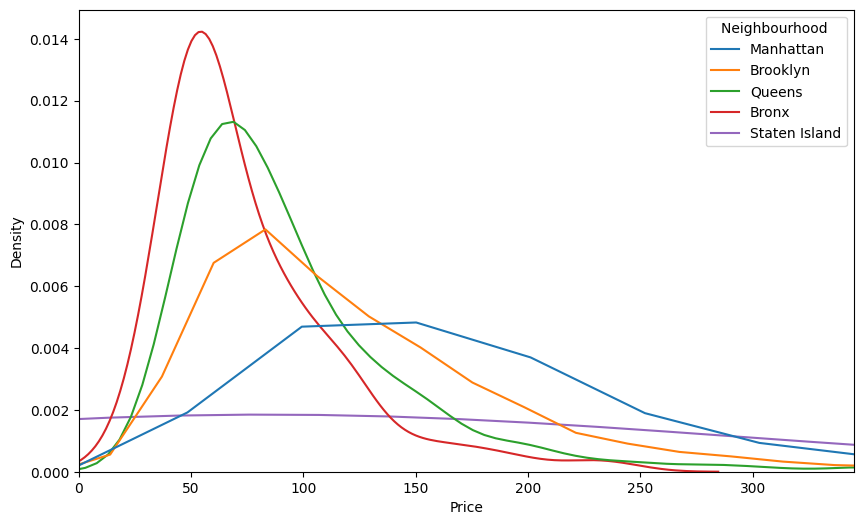

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

q1_df = pd.read_csv("./data/Q1_clean.csv")

#1.
print("1.")
# print(q1_df["Neighbourhood "].value_counts())
manhattan = q1_df[q1_df["Neighbourhood "] == 'Manhattan']
manhattan_average_price = manhattan["Price"].mean()
manhattan_average_scores = manhattan["Review Scores Rating"].mean()

brooklyn = q1_df[q1_df["Neighbourhood "] == 'Brooklyn']
brooklyn_average_price = brooklyn["Price"].mean()
brooklyn_average_scores = brooklyn["Review Scores Rating"].mean()

queens = q1_df[q1_df["Neighbourhood "] == 'Queens']
queens_average_price = queens["Price"].mean()
queens_average_scores = queens["Review Scores Rating"].mean()

bronx = q1_df[q1_df["Neighbourhood "] == 'Bronx']
bronx_average_price = bronx["Price"].mean()
bronx_average_scores = bronx["Review Scores Rating"].mean()

staten_island = q1_df[q1_df["Neighbourhood "] == 'Staten Island']
staten_island_average_price = staten_island["Price"].mean()
staten_island_average_scores = staten_island["Review Scores Rating"].mean()

names = ["Manhattan", "Brooklyn", "Queens", "Bronx", "Staten Island"]
prices = [manhattan_average_price, brooklyn_average_price, queens_average_price, bronx_average_price, staten_island_average_price]
for i in range(len(prices)):
    print(names[i], ":", prices[i])
scores = [manhattan_average_scores, brooklyn_average_scores, queens_average_scores, bronx_average_scores, staten_island_average_scores]
# for each in scores:
#     print(each)
print("\nIt appears Manhattan and Brooklyn has the highest average price of 183.6642863215166.")

q1_df['LogPrice'] = np.log(q1_df['Price'] + 1)  # Add 1 to avoid log(0)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=q1_df, x='Price', hue='Neighbourhood ', common_norm=False)
plt.xlim(0, q1_df['Price'].quantile(0.95))  # Optional: limit x-axis to avoid long tails
plt.show()


2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?

In [3]:
#2.
print("2.")

X_ind = pd.get_dummies(q1_df['Neighbourhood '])
y = q1_df['Price'].values

X_matrix = X_ind.values.astype(float)
beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y

coefficients = pd.Series(beta, index=X_ind.columns)
print(coefficients)
print("\nAccording to what's shown here and from part 1, the dummy variables' coefficients are the same as in part 1 means for prices. \nThis is because we did not have an intercept in the linear model and used all the data. Therefore, the coefficients just represent the average price for \neach category. \n\nIf we predict a continuous variable using a categorical variable, we'd essentially be predicting the average of the values in the categorical \nvariable column. Therefore, the coefficients would represent the average of the continuous variable for each categorical variable.")

2.
Bronx             75.276498
Brooklyn         127.747378
Manhattan        183.664286
Queens            96.857233
Staten Island    146.166667
dtype: float64

According to what's shown here and from part 1, the dummy variables' coefficients are the same as in part 1 means for prices. 
This is because we did not have an intercept in the linear model and used all the data. Therefore, the coefficients just represent the average price for 
each category. 

If we predict a continuous variable using a categorical variable, we'd essentially be predicting the average of the values in the categorical 
variable column. Therefore, the coefficients would represent the average of the continuous variable for each categorical variable.


3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?


In [4]:
#3.
print("3.")

X_ind = pd.get_dummies(q1_df['Neighbourhood '], drop_first=True)
y = q1_df['Price'].values

X_matrix = X_ind.values.astype(float)
X_with_intercept = np.hstack([np.ones((X_matrix.shape[0], 1)), X_matrix])
beta = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

labels = ['Intercept'] + list(X_ind.columns)
coefficients = pd.Series(beta, index=labels)
print(coefficients)

print("\nI used drop_first=True to drop the intercept column so we could leave an intercept for the linear model. The intercept appears to be 75.276498. \nThe coefficients are now the values for the coefficients from part 2 minus the intercept earlier. To get the coefficients in part 2, just add the intercept \nto these new coefficients.")


3.
Intercept         75.276498
Brooklyn          52.470881
Manhattan        108.387789
Queens            21.580735
Staten Island     70.890169
dtype: float64

I used drop_first=True to drop the intercept column so we could leave an intercept for the linear model. The intercept appears to be 75.276498. 
The coefficients are now the values for the coefficients from part 2 minus the intercept earlier. To get the coefficients in part 2, just add the intercept 
to these new coefficients.


4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?

In [5]:
#4.
print("4.")

from sklearn.model_selection import train_test_split

# code from above:
X_ind = pd.get_dummies(q1_df['Neighbourhood '], drop_first=True)

X = pd.concat([q1_df["Review Scores Rating"], X_ind], axis=1)
y = q1_df['Price'].values

X.insert(0, 'Intercept', 1.0)
X_matrix = X.values.astype(float)

# actual splitting:
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42)

# more code from above (get coefficients):
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = X_test @ beta
coefficients = pd.Series(beta, index=X.columns)

# errors and R^2:
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# RMSE:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

print("R^2 on test:", r_squared)
print("RMSE on test:", rmse)

#print coefficients:
print("\n")
print(coefficients)
print("\nThe Review Scores Rating coefficient is 1.211852 in this case.\n")

sorted_property_types = q1_df.groupby("Property Type")["Price"].mean().sort_values(ascending=False)
print(sorted_property_types.head())
print("\nIt appears the most expensive property type is the Condominium with an average price of 241.229167.")


4.
R^2 on test: 0.045925883817350965
RMSE on test: 140.91821103729345


Intercept               -35.157344
Review Scores Rating      1.211852
Brooklyn                 51.555970
Manhattan               107.413553
Queens                   20.198573
Staten Island            23.454672
dtype: float64

The Review Scores Rating coefficient is 1.211852 in this case.

Property Type
Condominium    241.229167
Townhouse      214.253012
Loft           203.571912
Other          178.928571
Treehouse      167.666667
Name: Price, dtype: float64

It appears the most expensive property type is the Condominium with an average price of 241.229167.


5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?


In [6]:
#5.
print("5.")

# code from above:
X_ind = pd.get_dummies(q1_df['Neighbourhood '], drop_first=True)
property_type_dummies = pd.get_dummies(q1_df['Property Type'], drop_first=True)

X = pd.concat([q1_df["Review Scores Rating"], X_ind, property_type_dummies], axis=1)
X.insert(0, 'Intercept', 1.0)

y = q1_df['Price'].values
X_matrix = X.values.astype(float)

# actual splitting:
X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42)

# more code from above (get coefficients):
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = X_test @ beta
coefficients = pd.Series(beta, index=X.columns)

# errors and R^2:
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

# RMSE:
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

print("R^2 on test:", r_squared)
print("RMSE on test:", rmse)

#print coefficients:
print("\n")
print(coefficients)
print("\nThe Review Scores Rating coefficient is 1.201011 in this case.\n")

sorted_property_types = q1_df.groupby("Property Type")["Price"].mean().sort_values(ascending=False)
print(sorted_property_types.head())
print("\nIt appears the most expensive property type is still the Condominium with an average price of 241.229167.")


5.
R^2 on test: 0.05424271355124566
RMSE on test: 140.3026623827628


Intercept               -49.296038
Review Scores Rating      1.201011
Brooklyn                 59.633702
Manhattan               121.005520
Queens                   26.830617
Staten Island            15.700974
Bed & Breakfast         -28.703920
Boat                     47.070419
Bungalow                 83.972440
Cabin                    12.389621
Camper/RV               -13.817125
Castle                  -41.810548
Chalet                  -30.237720
Condominium              61.907162
Dorm                    -42.277758
House                    34.711346
Hut                    -134.604484
Lighthouse              -91.438731
Loft                     69.891025
Other                    49.249761
Townhouse                44.110768
Treehouse                10.325182
Villa                    33.901468
dtype: float64

The Review Scores Rating coefficient is 1.201011 in this case.

Property Type
Condominium    241.229167
Townh

5. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.

In [7]:
#6.
print("6.")

print("If the coefficient changes from part 4 to part 5, it means that the estimated effect of a one-point increase in Review Scores Rating on price has \nbeen adjusted after accounting for more variables. In part 5, a one-point increase in Review Scores Rating is associated with an increase of 1.201011 in price.")


6.
If the coefficient changes from part 4 to part 5, it means that the estimated effect of a one-point increase in Review Scores Rating on price has 
been adjusted after accounting for more variables. In part 5, a one-point increase in Review Scores Rating is associated with an increase of 1.201011 in price.


7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

In [8]:
#7.
print("7.")
# I have no idea if any of this is correct.

# interaction & new dummies:
q1_df["Neighborhood_Property"] = q1_df["Neighbourhood "] + " x " + q1_df["Property Type"] # new string column of neighbourhood + property type
np_dummies = pd.get_dummies(q1_df["Neighborhood_Property"], drop_first=True)

X = pd.concat([q1_df["Review Scores Rating"], np_dummies], axis=1)
X.insert(0, 'Intercept', 1.0)

y = q1_df["Price"].values
X_matrix = X.values.astype(float)

X_train, X_test, y_train, y_test = train_test_split(X_matrix, y, test_size=0.2, random_state=42)

beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = X_test @ beta

ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r_squared = 1 - (ss_res / ss_tot)
rmse = np.sqrt(np.mean((y_test - y_pred) ** 2))

coefficients = pd.Series(beta, index=X.columns)

# new prints:
print("R^2 on test:", r_squared)
print("RMSE on test:", rmse)
print("Coefficient for Review Scores Rating:", coefficients["Review Scores Rating"])
print("\nIt appears the R^2 increases ever so slightly, but the RMSE decreases a little bit. They don't change much though compared to the last part.\n")

sorted_property_types = q1_df.groupby("Property Type")["Price"].mean().sort_values(ascending=False)
print(sorted_property_types.head())
print("\nIt appears the most expensive property type is still the Condominium with an average price of 241.229167. I'm not sure why this didn't change.")


7.
R^2 on test: 0.05455880901061472
RMSE on test: 140.27921411468847
Coefficient for Review Scores Rating: 1.19901770781258

It appears the R^2 increases ever so slightly, but the RMSE decreases a little bit. They don't change much though compared to the last part.

Property Type
Condominium    241.229167
Townhouse      214.253012
Loft           203.571912
Other          178.928571
Treehouse      167.666667
Name: Price, dtype: float64

It appears the most expensive property type is still the Condominium with an average price of 241.229167. I'm not sure why this didn't change.


**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

heart_df = pd.read_csv("./data/heart_hw.csv")

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.

In [23]:
print(heart_df.columns)
# print("\n")
# print(heart_df.head())

#a. 
control_num = heart_df[heart_df["transplant"] == 'control']
proportion_a = (control_num["y"] == 1).mean()
print("proportion of control group that survived:", proportion_a)

#b.
treatment_num = heart_df[heart_df["transplant"] == 'treatment']
proportion_b = (treatment_num["y"] == 1).mean()
print("proportion of treatment group that survived:", proportion_b)

diff_b = proportion_b - proportion_a

print("(treatment & survived) - (control & survived) =", diff_b)


Index(['Unnamed: 0', 'age', 'transplant', 'y'], dtype='object')
proportion of control group that survived: 0.11764705882352941
proportion of treatment group that survived: 0.34782608695652173
(treatment & survived) - (control & survived) = 0.23017902813299232


2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.


In [32]:
heart_df['transplant_dummy'] = (heart_df['transplant'] == 'treatment').astype(int)

output = heart_df['y'].values
X = np.column_stack((np.ones(len(heart_df)), heart_df['transplant_dummy'].values))

beta = np.linalg.inv(X.T @ X) @ X.T @ output

y_pred = X @ beta

print("intercept is:", beta[0])


intercept is: 0.11764705882352944


Here, we see that the intercept is 0.11764705882352944, which, excluding rounding errors, is the exact same as the proportion of control group that survived above in part 1. 

If we regress y on transplant, there are 2 betas (intercept and one coefficient). And since the transplant is on the "x-axis" of this problem, the coefficient represents the coefficient of the transplant group. When transplant = 0, or the participant received a control, the result is just the intercept as the transplant term 0's out. Therefore, the intercept, when treatment = 0 or control, is the same as the proportion of observations that received the control and survived.

3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?

In [ ]:
heart_df['transplant_dummy'] = (heart_df['transplant'] == 'treatment').astype(int)

# X = np.column_stack((np.ones(len(heart_df)), heart_df['transplant_dummy'].values))

X = pd.DataFrame({'intercept': 1.0, 'transplant': heart_df['transplant_dummy'], 'age': heart_df['age']
})

output = heart_df['y'].values
X_matrix = X.values
# .astype(float)

beta = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ output

y_pred = X_matrix @ beta

print("intercept is:", beta[0])


intercept is: 0.7019569721740955


It appaers the intercept increases greatly from the original to 0.7019569721740955. This is most likely because we added the new age variable to the regression. This is probably because it's the proportion of the control group that survived, and with the age = 0.

4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.

y_pred: [ 0.50963272  0.27269953  0.18055043  0.19867093  0.23537591  0.02442565
  0.38838224  0.27269953  0.23697475  0.01561251  0.63645096  0.16656065
  0.16258459  0.27269953  0.25396039 -0.0078414   0.29159333  0.10961504
 -0.05780615  0.07986039  0.408204  ]


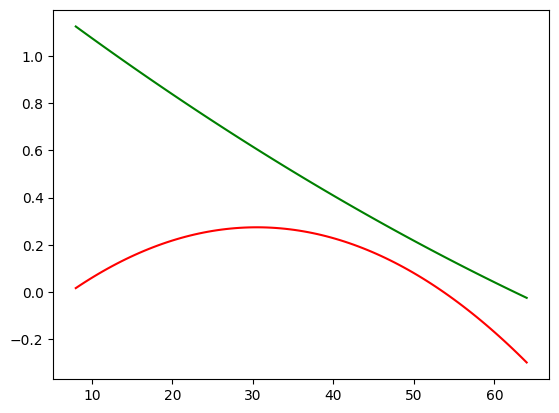

In [ ]:
# heart_df["age_treatment"] = heart_df["age"] + " x " + heart_df["treatment"] # new string column of age x treatment

heart_df['transplant_dummy'] = (heart_df['transplant'] == 'treatment').astype(int)
heart_df['age_squared'] = heart_df['age'] ** 2
heart_df['treat_x_age'] = heart_df['transplant_dummy'] * heart_df['age']
heart_df['treat_x_age_squared'] = heart_df['transplant_dummy'] * heart_df['age_squared']

X = pd.DataFrame({'intercept': 1.0, 'age': heart_df['age'], 'age_squared': heart_df['age_squared'], 'transplant': heart_df['transplant_dummy'], 'treat_x_age': heart_df['treat_x_age'], 'treat_x_age_squared': heart_df['treat_x_age_squared']})

output = heart_df['y'].values
X_matrix = X.values
X_train, X_test, y_train, y_test = train_test_split(X_matrix, output, test_size=0.2, random_state=42)
beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train
y_pred = X_test @ beta

print("y_pred:", y_pred)

ages = np.linspace(heart_df['age'].min(), heart_df['age'].max(), 100)

X_control = pd.DataFrame({
    'Intercept': 1.0, 'Age': ages,
    'Age^2': ages**2,
    'Treatment': 0,
    'Treatment x Age': 0,
    'Treatment x Age^2': 0
})
y_control_pred = X_control @ beta

X_treatment = pd.DataFrame({
    'Intercept': 1.0,
    'Age': ages,
    'Age^2': ages**2,
    'Treatment': 1,
    'Treatment x Age': ages,
    'Treatment x Age^2': ages**2
})
y_treat_pred = X_treatment @ beta

plt.plot(ages, y_treat_pred, label='Treatment', color='green')
plt.plot(ages, y_control_pred, label='Control', color='red')
plt.show()

Since the control predicted y for the control transplant "peaks" at around ages 30-40, we understand that there's a higher survival rate for middle age individuals (30-40) for the control. There are lower survival rates as you go to the extremes of age. For the treatment group, the survival rate is higher for younger individuals than for older individuals from the graph. 

For the control, this may be because younger and older individuals are more susceptible to heart issues, and from dying from them without treatment. However, for the treated individuals, the younger individuals most likely have the physicality and health to survive the treatment surgeries, while the older individuals lack the vigor and health to survive.

5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

I'm concerned that older individuals will be more overlooked when it comes to who receives an organ. This is because the CDC and other organizations might see correlation as causation (health increases survival rates) and not consider the individual out of the many observations. An older individual might be well more healthy compared to a younger individual who has even more health issues, like brain cancer or slight obesity. 

I'm just concerned that the regression, something to predict, might have a biased model, and that we're solely looking at numbers to predict human outcomes.

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
